We look at the impact of theoretical uncertainties in PTA correlations analysis.

In [1]:
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt
import os # requires *full path*

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from numpy.random import multivariate_normal as MN

from PTAfast.tensor import Tensor
from PTAfast.hellingsdowns import HellingsDowns as HD

### Correlations data and likelihood

We consider the binned correlations data set by NANOGrav, shown below.

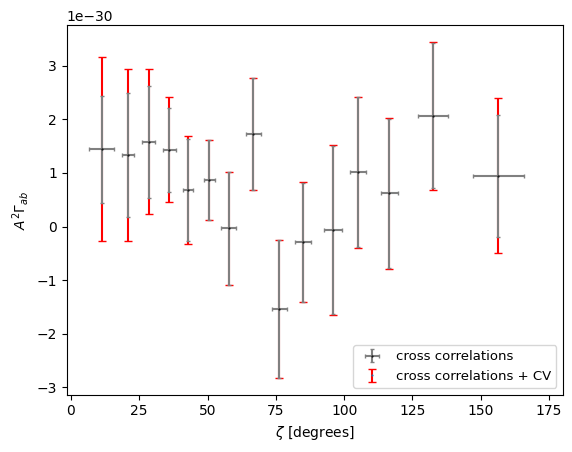

In [2]:
# import binned correlations data
data_loc = 'orf_n12p5.txt'
ng12 = np.loadtxt(data_loc)

# cross correlations
tta = ng12[0] # radians 
Dtta = ng12[1] # radians
ccp = ng12[2]
Dccp = ng12[3]

# visualize points
fig, ax = plt.subplots()
ax.errorbar(tta*180/np.pi, ccp, xerr = Dtta*180/np.pi, yerr = Dccp, \
            label = 'cross correlations', zorder = 10, \
            fmt = 'k.', markersize = 1, ecolor = 'gray', elinewidth = 1.5, capsize = 1.5)

# with cosmic variance
Dccp_cv = (3.9e-30)*np.sqrt(HD(lm = 60).get_ORF(tta)['CV']) + \
(1.5e-30)*HD(lm = 60).get_ORF(tta)['ORF']
Dccp_Total = np.sqrt(Dccp**2 + Dccp_cv**2)
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp_Total, \
            label = 'cross correlations + CV', \
            fmt = '.', markersize = 1, ecolor = 'red', elinewidth = 1.5, capsize = 3)

ax.set_xlim(-1.5, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$A^2 \Gamma_{ab}$')
ax.legend(loc = 'lower right', prop = {'size': 9.5})
plt.show()

We now setup the likelihoods for tensor correlations, in `correlations.py` and `correlations_another.py`, taking into account the theoretical uncertainties (given by the cosmic variance). We use this later together with `cobaya` and `getdist` to study the sampled posterior of the GW parameters.

See code `correlations.py` for implementation for terminal. Sampling with Cobaya, e.g., `cobaya-run xxx.yaml` or with MPI `mpirun -n 8 cobaya-run xxx.yaml`.

Below, we import the results obtained from the sampling (saved in a folder "chains").

### Hellings-Downs correlations

In [3]:
folder_file_1 = 'chains/hd_unc0'
folder_file_2 = 'chains/hd_unc2'
folder_file_3 = 'chains/hd_unc2_another'
folder_file_4 = 'chains/mon'
folder_file_grn = 'chains/grn' # gaussian random noise

gdsamples_1 = loadMCSamples(os.path.abspath(folder_file_1))
gdsamples_2 = loadMCSamples(os.path.abspath(folder_file_2))
gdsamples_3 = loadMCSamples(os.path.abspath(folder_file_3))
gdsamples_4 = loadMCSamples(os.path.abspath(folder_file_4))
gdsamples_grn = loadMCSamples(os.path.abspath(folder_file_grn))

# get statistics
stats_1 = gdsamples_1.getMargeStats()
stats_2 = gdsamples_2.getMargeStats()
stats_3 = gdsamples_3.getMargeStats()
stats_4 = gdsamples_4.getMargeStats()
stats_grn = gdsamples_grn.getMargeStats()

# convergence of each chains
print('hd (NG12) : ', gdsamples_1.getGelmanRubin())
print('hd + cv (NG12) : ', gdsamples_2.getGelmanRubin())
print('hd (NG12 + CV) : ', gdsamples_3.getGelmanRubin())
print('mon (NG12): ', gdsamples_4.getGelmanRubin())
print('GRN : ', gdsamples_grn.getGelmanRubin())

auto bandwidth for chi2 very small or failed (h=0.0010607683584647428,N_eff=461.71949589459615). Using fallback (h=0.009460886211027345)
auto bandwidth for chi2 very small or failed (h=0.0010785340235252665,N_eff=490.28130480533144). Using fallback (h=0.005488543547562852)
auto bandwidth for chi2 very small or failed (h=0.000986993946836522,N_eff=665.8445006321112). Using fallback (h=0.00639702470237635)
hd (NG12) :  0.00569588190764614
hd + cv (NG12) :  0.0003001231904826716
hd (NG12 + CV) :  inf
mon (NG12):  0.0073871113811782504
GRN :  0.009968547406391462


/home/kinwangngpc/miniconda3/lib/python3.9/site-packages/getdist/chains.py:1413: RuntimeWarning: divide by zero encountered in true_divide
  meanscov /= (len(chainlist) - 1)


We show the posteriors for the correlations with and without uncertainty.

auto bandwidth for chi2 very small or failed (h=0.0010607683584647428,N_eff=461.71949589459615). Using fallback (h=0.009460886211027345)
auto bandwidth for chi2 very small or failed (h=0.0010785340235252665,N_eff=490.28130480533144). Using fallback (h=0.005488543547562852)
fine_bins_2D not large enough for optimal density: A2, chi2
fine_bins_2D not large enough for optimal density: A2, chi2


<Figure size 700x630 with 0 Axes>

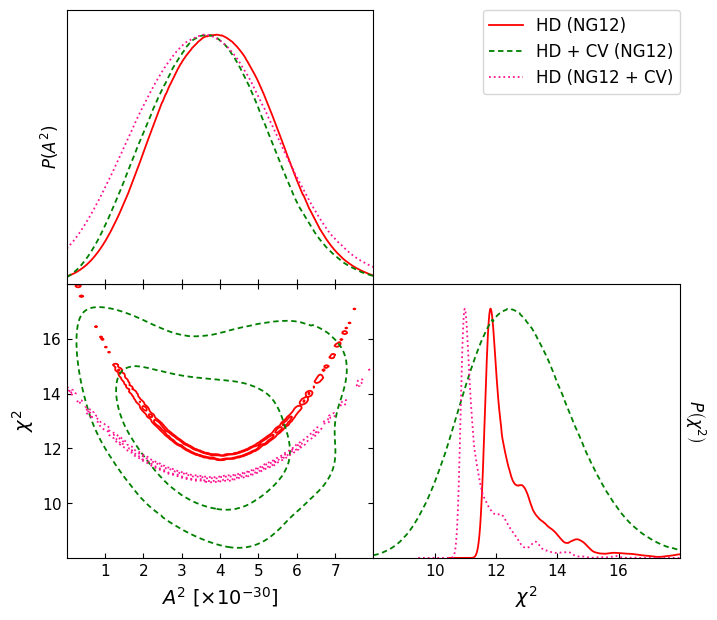

In [4]:
gdplot = gdplt.get_single_plotter(width_inch = 7, ratio = 9/10)
gdplot.triangle_plot([gdsamples_1, gdsamples_2, gdsamples_3], \
                     ["A2", "chi2"], \
                     contour_ls = ['-', '--', ':', ':'], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue'], \
                     filled = False, \
                     title_limit = 0, \
                     legend_labels = ['HD (NG12)', 'HD + CV (NG12)', \
                                      'HD (NG12 + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'A2': (0.01, 8), 'chi2': (8, 18)})

# add y-axis labels manually
y_labels = [r'$P\left(A^2\right)$', r'$P\left(\chi^2\right)$'] # labels for y-axes
axes = gdplot.subplots
axes[0, 0].set_ylabel(y_labels[0])
axes[0, 0].yaxis.label.set_size(12)
axes[1, 1].set_ylabel(y_labels[1])
axes[1, 1].yaxis.label.set_size(12)
axes[1, 0].set_xlabel(r'$A^2$ [$\times 10^{-30}$]')
# get the lower right subplot
ax = gdplot.subplots[-1][-1]
# set the label on the right
ax.yaxis.set_label_position("right")
ax.yaxis.label.set_rotation(270)
ax.yaxis.set_label_coords(1.09, 0.5)

plt.show()

We print the statistics for each correlations model to see if this was impacted by the theoretical uncertainty.

In [5]:
print('monopole')
c2_monbf = stats_4.parWithName('chi2').bestfit_sample
print('chi^2 :', c2_monbf/len(tta))
print()

print('HD (NG12)')
c2_HDbf = stats_1.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('HD + CV (NG12)')
c2_HDbf = stats_2.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('HD (NG12 + CV)')
c2_HDbf = stats_3.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('Gaussian random noise (sigma)')
c2_grn = stats_grn.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_grn/len(tta))
print()

monopole
chi^2 : 0.5810926799999999

HD (NG12)
best chi^2 : 0.778412

HD + CV (NG12)
best chi^2 : 0.60623586

HD (NG12 + CV)
best chi^2 : 0.725006

Gaussian random noise (sigma)
best chi^2 : 0.2958089



We plot the mean curves for the sampled correlations with and without the cosmic variance.

In [6]:
# ORFs
lMax = 60
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
Gab_HD = HD(lm = lMax).get_ORF(Zeta)

# without variance
A2Gab_HD0 = stats_1.parWithName('A2').mean*Gab_HD['ORF']

# with variance, mock + CV approach
A2Gab_HD1 = stats_2.parWithName('A2').mean*Gab_HD['ORF']
A2Gab_HD1_unc = stats_2.parWithName('A2').mean*np.sqrt(Gab_HD['CV']) + \
stats_2.parWithName('A2').err*Gab_HD['ORF']

# with variance, data + CV approach
A2Gab_HD2 = stats_3.parWithName('A2').mean*Gab_HD['ORF']
A2Gab_HD2_unc = stats_3.parWithName('A2').mean*np.sqrt(Gab_HD['CV']) + \
stats_3.parWithName('A2').err*Gab_HD['ORF']

# Gaussian random noise
A2_grn = stats_grn.parWithName('A2').mean
sigma_grn = stats_grn.parWithName('sigma').mean
A2Gab_grn_up = A2_grn*(0.5 + sigma_grn)
A2Gab_grn_low = A2_grn*(0.5 - sigma_grn)

Finally the mean curves are obtained and presented below together with their cosmic variances.

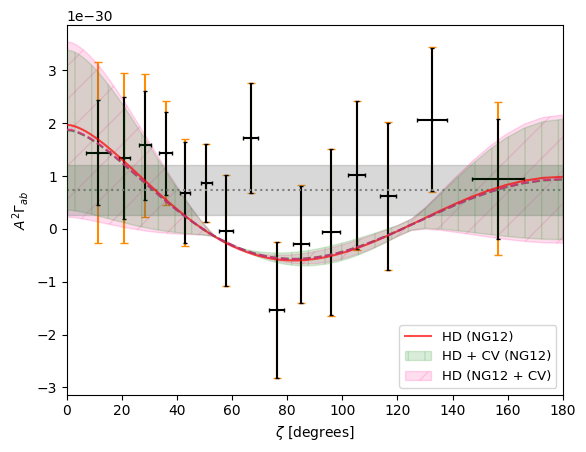

In [7]:
# plot best fits
fig, ax = plt.subplots()
ax.errorbar(tta*180/np.pi, ccp, xerr = Dtta*180/np.pi, yerr = Dccp, zorder = 1, \
            fmt = 'k.', markersize = 1, ecolor = 'black', elinewidth = 1.5, capsize = 1.5)
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp_Total, zorder = 0, \
            fmt = '.', markersize = 1, ecolor = 'darkorange', elinewidth = 1.5, capsize = 3)

# GW correlations
ax.plot(Zeta*180/np.pi, A2Gab_HD0*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'red', ls = '-', label = r'HD (NG12)')

# with cosmic variance, HD + CV
ax.plot(Zeta*180/np.pi, A2Gab_HD1*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'green', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_HD1 - A2Gab_HD1_unc)*(1e-30), \
                (A2Gab_HD1 + A2Gab_HD1_unc)*(1e-30), \
                zorder = 9, facecolor = 'green', edgecolor = 'green', \
                alpha = 0.15, hatch = '|', rasterized = True, \
                label = r'HD + CV (NG12)')

# with cosmic variance, data + CV
ax.plot(Zeta*180/np.pi, A2Gab_HD2*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'deeppink', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_HD2 - A2Gab_HD2_unc)*(1e-30), \
                (A2Gab_HD2 + A2Gab_HD2_unc)*(1e-30), \
                zorder = 0, facecolor = 'deeppink', edgecolor = 'deeppink', \
                alpha = 0.15, hatch = '/', rasterized = True, \
                label = r'HD (NG12 + CV)')

ax.plot(Zeta*180/np.pi, [A2_grn*0.5*(1e-30)]*len(Zeta), ':', \
        color = 'gray', markersize = 2, zorder = 2)
ax.fill_between(Zeta*180/np.pi, A2Gab_grn_up*(1e-30), A2Gab_grn_low*(1e-30), \
                zorder = 0, facecolor = 'gray', edgecolor = 'gray', \
                alpha = 0.30)
ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$A^2 \Gamma_{ab}$')
ax.legend(loc = 'lower right', prop = {'size': 9.5})
plt.show()

We present below the Bayesian evidences corresponding to each cosmic variance utilization with the HD curve. These were calculated using `ultranest` in the python files `evidence_....py`, e.g., run in a cluster as `mpirun -n 12 python evidence_ng_hd.py` to calculate Bayesian evidences of the HD with and without cosmic variance.

In [8]:
def A2_unit_transform(u):
    '''used in ultranest to map parameters to unit cube'''
    return 10 * u  # Map from unit cube [0, 1] to [0, 10]

evidencefiles = ['ng_HD0', 'ng_HDplusCV', 'ng_DataplusCV', 'ng_mon', 'ng_grn']

for evidencefile in evidencefiles:
    # Specify the path to your text file
    file_path = 'result_' + evidencefile + '.txt'

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Create a dictionary to store the extracted values
    extracted_data = {}

    # Iterate over the lines
    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespaces
        if '=' in line:
            key, value = line.split('=')
            key = key.strip()
            value = value.strip()

            if key.startswith('logz') or key.startswith('logzerr'):
                extracted_data[key] = float(value)
            elif key == 'posterior':
                # Convert the string representation of the dictionary to an actual dictionary
                extracted_data[key] = eval(value)

    # Print the extracted values
    print(evidencefile)
    print('logz:', extracted_data['logz'], '+/-', extracted_data['logzerr'])
    print('posterior:', A2_unit_transform(extracted_data['posterior']['mean'][0]), \
          '+/-', A2_unit_transform(extracted_data['posterior']['stdev'][0]))
    print()

ng_HD0
logz: -6.795596956803187 +/- 0.06450209948086344
posterior: 3.9585060119367115 +/- 1.476570878830906

ng_HDplusCV
logz: -7.2315017791122305 +/- 0.089369104223253
posterior: 3.6799337079806884 +/- 1.4659680043571819

ng_DataplusCV
logz: -6.123160408318928 +/- 0.06845680292506588
posterior: 3.9596448655636136 +/- 1.8721333823647324

ng_mon
logz: -6.397935858519883 +/- 0.09959803274617478
posterior: 1.76588894505049 +/- 0.544852111702498

ng_grn
logz: -8.46559428078991 +/- 0.4132289343663755
posterior: 1.4858885957742383 +/- 0.6321621694862605



### Tensor correlations

We now take a look at tensor correlations more conservatively and consider subluminal GW propagations. Below, we import sampled posteriors of subluminal GW correlations given the present data.

In [8]:
folder_file_1 = 'chains/tensors_unc0'
folder_file_2 = 'chains/tensors_unc2'
folder_file_3 = 'chains/tensors_unc2_tcv'
folder_file_4 = 'chains/mon'

gdsamples_1 = loadMCSamples(os.path.abspath(folder_file_1))
gdsamples_2 = loadMCSamples(os.path.abspath(folder_file_2))
gdsamples_3 = loadMCSamples(os.path.abspath(folder_file_3))
gdsamples_4 = loadMCSamples(os.path.abspath(folder_file_4))

# get statistics
stats_1 = gdsamples_1.getMargeStats()
stats_2 = gdsamples_2.getMargeStats()
stats_3 = gdsamples_3.getMargeStats()
stats_4 = gdsamples_4.getMargeStats()

# convergence of each chains
print('tensor (NG12) : ', gdsamples_1.getGelmanRubin())
print('tensor + CV (NG12) : ', gdsamples_2.getGelmanRubin())
print('tensor (NG12 + CV) : ', gdsamples_3.getGelmanRubin())
print('mon : ', gdsamples_4.getGelmanRubin())

auto bandwidth for m_g very small or failed (h=0.0006666472679071557,N_eff=6290.706550604652). Using fallback (h=0.010741518938277276)
auto bandwidth for chi2 very small or failed (h=0.0005364351520515188,N_eff=6393.204446979482). Using fallback (h=0.0048164933946206875)
auto bandwidth for m_g very small or failed (h=0.0004665722742873558,N_eff=6865.6120736324865). Using fallback (h=0.010379563755566716)
auto bandwidth for m_g very small or failed (h=0.0009451923232229239,N_eff=4162.611117802837). Using fallback (h=0.012319420838875397)
auto bandwidth for chi2 very small or failed (h=0.0005399169766024583,N_eff=4245.092258921135). Using fallback (h=0.0057394809363730225)
auto bandwidth for chi2 very small or failed (h=0.000986993946836522,N_eff=665.8445006321112). Using fallback (h=0.00639702470237635)
tensor (NG12) :  0.0021221632258149473
tensor + CV (NG12) :  0.0038124358502464213
tensor (NG12 + CV) :  0.0017782919229815653
mon :  0.0073871113811782504


The posterior $A^2 \times v$ of subluminal GW correlations with and without theoretical uncertainties are shown below.

auto bandwidth for chi2 very small or failed (h=0.0005364351520515188,N_eff=6393.204446979482). Using fallback (h=0.0048164933946206875)
auto bandwidth for chi2 very small or failed (h=0.0005399169766024583,N_eff=4245.092258921135). Using fallback (h=0.0057394809363730225)


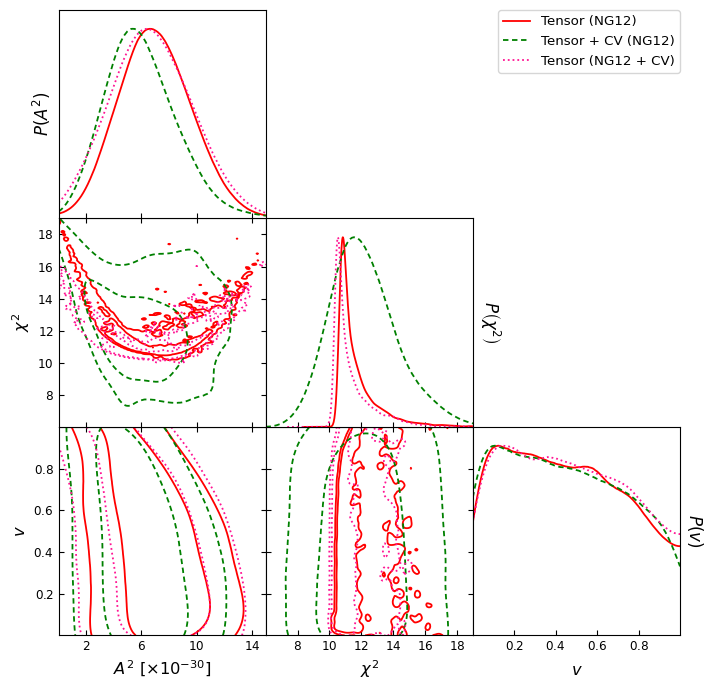

In [9]:
gdplot = gdplt.get_subplot_plotter(width_inch = 7)
gdplot.triangle_plot([gdsamples_1, gdsamples_2, gdsamples_3], \
                     ["A2", "chi2", "v"], \
                     contour_ls = ['-', '--', ':', ':'], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue'], \
                     filled = False, \
                     title_limit = 0, \
                     legend_labels = ['Tensor (NG12)', \
                                      'Tensor + CV (NG12)', \
                                      'Tensor (NG12 + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'A2': (0.01, 15), 'chi2': (6, 19)})

# add y-axis labels manually
y_labels = [r'$P\left(A^2\right)$', r'$P\left(\chi^2\right)$', r'$P\left(v\right)$'] # labels for y-axes
axes = gdplot.subplots
axes[0, 0].set_ylabel(y_labels[0])
axes[0, 0].yaxis.label.set_size(12)
axes[1, 1].set_ylabel(y_labels[1])
axes[1, 1].yaxis.label.set_size(12)
axes[2, 2].set_ylabel(y_labels[2])
axes[2, 2].yaxis.label.set_size(12)
# get the lower right subplot
ax = gdplot.subplots[-1][-1]
# set the label on the right
ax.yaxis.set_label_position("right")
ax.yaxis.label.set_rotation(270)
ax.yaxis.set_label_coords(1.12, 0.5)
# get the lower right subplot
ax = gdplot.subplots[1][1]
# set the label on the right
ax.yaxis.set_label_position("right")
ax.yaxis.label.set_rotation(270)
ax.yaxis.set_label_coords(1.14, 0.5)

plt.show()

The significance of these cross correlations are assessed by comparing with the monopole (flat line). This is presented below for the tensor correlations with uncertainty.

In [10]:
print('monopole')
c2_monbf = stats_4.parWithName('chi2').bestfit_sample
print('chi^2 :', c2_monbf/len(tta))
print()

print('Tensor (NG12)')
c2_Tbf = stats_1.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_Tbf/len(tta))
print()

print('Tensor + CV (NG12)')
c2_Tbf = stats_2.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_Tbf/len(tta))
print()

print('Tensor (NG12 + CV)')
c2_Tbf = stats_3.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_Tbf/len(tta))
print()

print('Gaussian random noise (sigma)')
c2_grn = stats_grn.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_grn/len(tta))
print()

monopole
chi^2 : 0.5810926799999999

Tensor (NG12)
best chi^2 : 0.63318756

Tensor + CV (NG12)
best chi^2 : 0.46167687999999996

Tensor (NG12 + CV)
best chi^2 : 0.5593363666666666

Gaussian random noise (sigma)
best chi^2 : 0.2958089



We see that the cosmic variance has significanly impacted the likelihood of the tensor correlations.

The best fit cross correlation curves are calculated as follows.

In [11]:
# ORFs
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)

# without variance
Gab_T0 = Tensor(lm = lMax, v = stats_1.parWithName('v').mean).get_ORF(Zeta)
A2Gab_T0 = stats_1.parWithName('A2').mean*Gab_T0['ORF']

# with variance, Tensor + CV approach
Gab_T1 = Tensor(lm = lMax, v = stats_2.parWithName('v').mean).get_ORF(Zeta)
A2Gab_T1 = stats_2.parWithName('A2').mean*Gab_T1['ORF']
A2Gab_T1_unc = stats_2.parWithName('A2').mean*np.sqrt(Gab_T1['CV']) + \
stats_2.parWithName('A2').err*Gab_T1['ORF']

# with variance, data + CV approach
Gab_T2 = Tensor(lm = lMax, v = stats_3.parWithName('v').mean).get_ORF(Zeta)
A2Gab_T2 = stats_3.parWithName('A2').mean*Gab_T2['ORF']
A2Gab_T2_unc = stats_3.parWithName('A2').mean*np.sqrt(Gab_T2['CV']) + \
stats_1.parWithName('A2').err*Gab_T2['ORF']

# Gaussian random noise
A2_grn = stats_grn.parWithName('A2').mean
sigma_grn = stats_grn.parWithName('sigma').mean
A2Gab_grn_up = A2_grn*(0.5 + sigma_grn)
A2Gab_grn_low = A2_grn*(0.5 - sigma_grn)

Here are the best fit GW correlations with and without the cosmic variance.

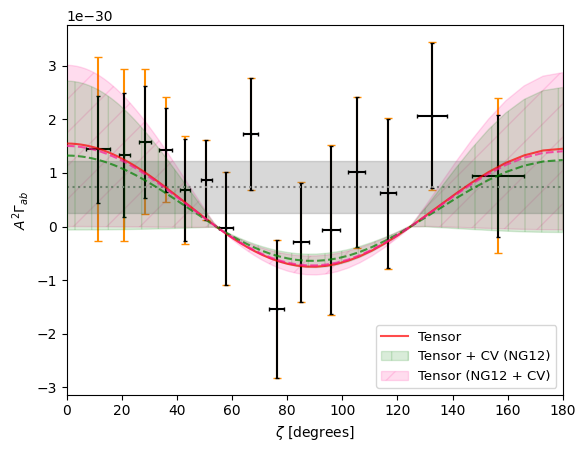

In [12]:
# plot best fits
fig, ax = plt.subplots()
ax.errorbar(tta*180/np.pi, ccp, xerr = Dtta*180/np.pi, yerr = Dccp, zorder = 1,
            fmt = 'k.', markersize = 1, ecolor = 'black', elinewidth = 1.5, capsize = 1.5)
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp_Total, zorder = 0, \
            fmt = '.', markersize = 1, ecolor = 'darkorange', elinewidth = 1.5, capsize = 3)

# GW correlations
ax.plot(Zeta*180/np.pi, A2Gab_T0*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'red', ls = '-', label = r'Tensor')

# with cosmic variance, Tensor + CV
ax.plot(Zeta*180/np.pi, A2Gab_T1*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'green', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_T1 - A2Gab_T1_unc)*(1e-30), \
                (A2Gab_T1 + A2Gab_T1_unc)*(1e-30), \
                zorder = 9, facecolor = 'green', edgecolor = 'green', \
                alpha = 0.15, hatch = '|', rasterized = True, \
                label = r'Tensor + CV (NG12)')

# with cosmic variance, data + CV
ax.plot(Zeta*180/np.pi, A2Gab_T2*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'deeppink', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_T2 - A2Gab_T2_unc)*(1e-30), \
                (A2Gab_T2 + A2Gab_T2_unc)*(1e-30), \
                zorder = 0, facecolor = 'deeppink', edgecolor = 'deeppink', \
                alpha = 0.15, hatch = '/', rasterized = True, \
                label = r'Tensor (NG12 + CV)')

ax.plot(Zeta*180/np.pi, [A2_grn*0.5*(1e-30)]*len(Zeta), ':', \
        color = 'gray', markersize = 2, zorder = 2)
ax.fill_between(Zeta*180/np.pi, A2Gab_grn_up*(1e-30), A2Gab_grn_low*(1e-30), \
                zorder = 0, facecolor = 'gray', edgecolor = 'gray', \
                alpha = 0.30)
ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$A^2 \Gamma_{ab}$')
ax.legend(loc = 'lower right', prop = {'size': 9.5})
plt.show()

We print out the Bayesian evidences in what follows. These were calculated similarly with the HD, e.g., `mpirun -n 12 python evidence_ng_tensors.py`.

In [23]:
def A2_unit_transform(u):
    '''used in ultranest to map parameters to unit cube'''
    return 10 * u  # Map from unit cube [0, 1] to [0, 10]

evidencefiles = ['ng_T0', 'ng_TplusCV', 'ng_DataplusTCV', 'ng_mon', 'ng_grn']

for evidencefile in evidencefiles:
    # Specify the path to your text file
    file_path = 'result_' + evidencefile + '.txt'

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Create a dictionary to store the extracted values
    extracted_data = {}

    # Iterate over the lines
    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespaces
        if '=' in line:
            key, value = line.split('=')
            key = key.strip()
            value = value.strip()

            if key.startswith('logz') or key.startswith('logzerr'):
                extracted_data[key] = float(value)
            elif key == 'posterior':
                # Convert the string representation of the dictionary to an actual dictionary
                extracted_data[key] = eval(value)

    # Print the extracted values
    print(evidencefile)
    print('logz:', extracted_data['logz'], '+/-', extracted_data['logzerr'])
    print('posterior:', A2_unit_transform(extracted_data['posterior']['mean'][0]), \
          '+/-', A2_unit_transform(extracted_data['posterior']['stdev'][0]))
    print()

ng_T0
logz: -6.558838725130971 +/- 0.06076561874309154
posterior: 3.5007031383554663 +/- 1.2843287086924815

ng_TplusCV
logz: -7.303333647768389 +/- 0.11498512255753782
posterior: 3.057027302083802 +/- 1.339197372417684

ng_DataplusTCV
logz: -6.312690338540223 +/- 0.07830298944802817
posterior: 3.3313758285620283 +/- 1.4815826276908992

ng_mon
logz: -6.397935858519883 +/- 0.09959803274617478
posterior: 1.76588894505049 +/- 0.544852111702498

ng_grn
logz: -8.46559428078991 +/- 0.4132289343663755
posterior: 1.4858885957742383 +/- 0.6321621694862605



End of notebook